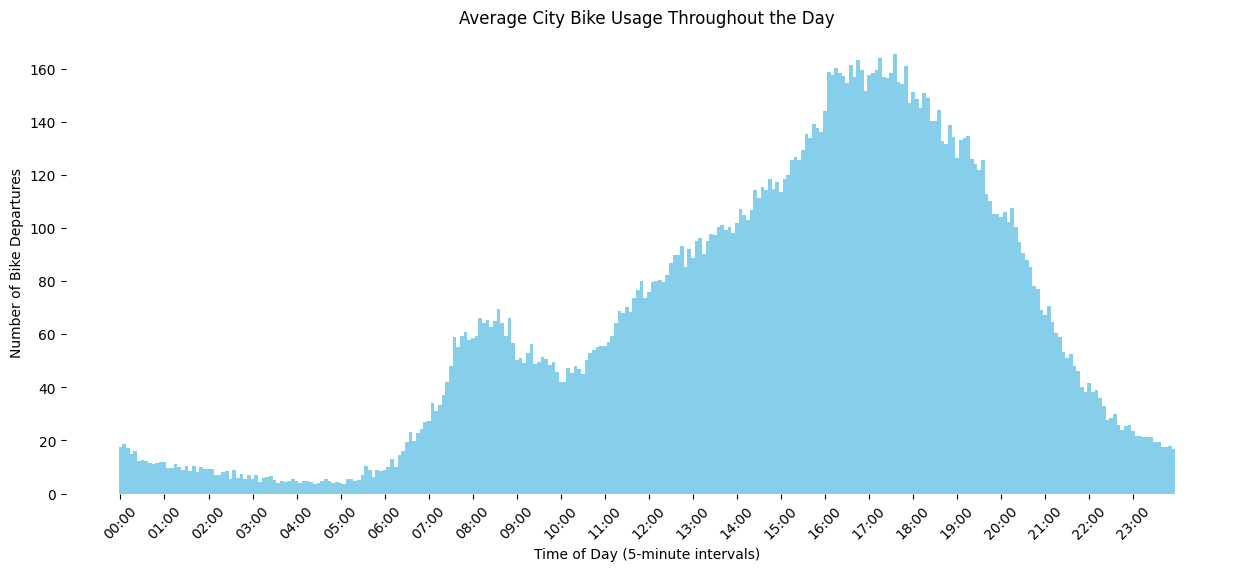

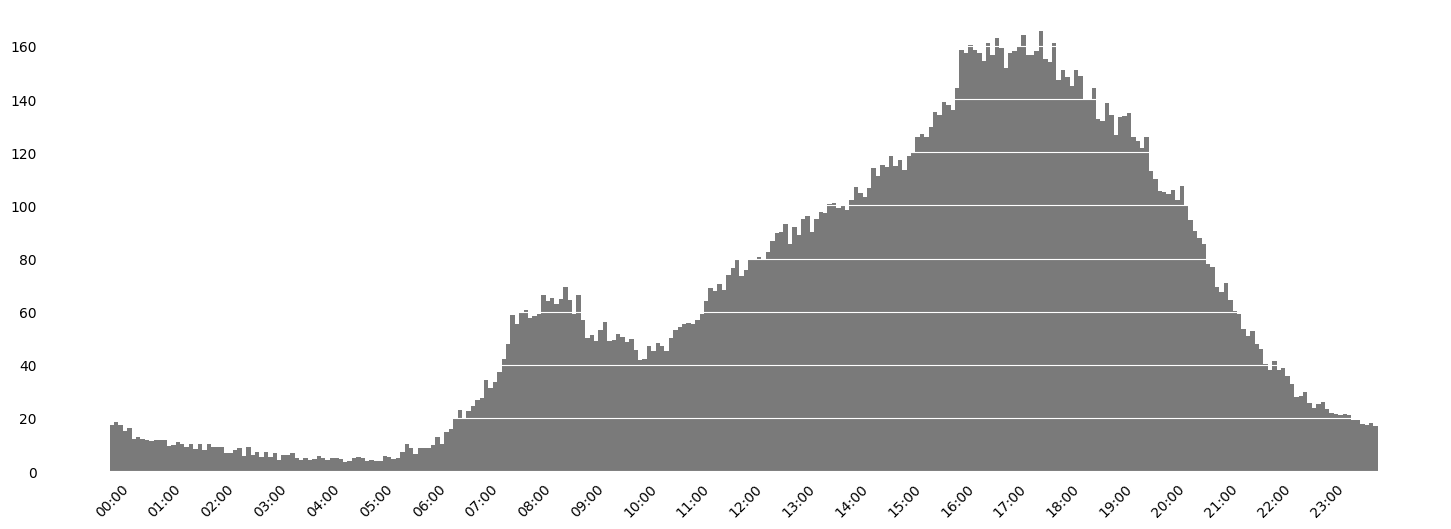

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/home/akupalo/informationviz/data/2021-04.csv")
df = df[df["Departure"].str.len() > 10]
df["Departure"] = pd.to_datetime(df["Departure"])

df["Date"] = df["Departure"].dt.date
df["Time Slot"] = df["Departure"].dt.floor("5min").dt.strftime("%H:%M")

daily_counts = df.groupby(["Date", "Time Slot"]).size().reset_index(name="Count")
average_counts = daily_counts.groupby("Time Slot")["Count"].mean()
#departure_counts = df["Time Slot"].value_counts().sort_index()

#first figure
plt.figure(figsize=(15, 6))
plt.bar(average_counts.index, average_counts.values, width=1.0, color='skyblue')

plt.xticks(range(0, len(average_counts), 12), average_counts.index[::12], rotation=45)

plt.xlabel("Time of Day (5-minute intervals)")
plt.ylabel("Number of Bike Departures")
plt.title("Average City Bike Usage Throughout the Day")
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False) 
plt.show()

#second figure
fig, ax = plt.subplots(figsize=(18,6))
ax.bar(average_counts.index, average_counts.values, color='#7a7a7a', width=1.0)

# Remove axis lines.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Add labels to x axis.
ax.set_xticks(range(0, len(average_counts), 12), average_counts.index[::12], rotation=45)

# Remove tick marks.
ax.tick_params(
    bottom=False,
    left=False, 
)

# Add bar lines as a horizontal grid.
ax.yaxis.grid(color='white')